In [ ]:
from IPython.display import HTML, display
display(HTML ('<style>.container {width:100%} important! </style>'))

**Alumno: Daniel Martínez Zapata**

**Diplomado en Ciencia de Datos**

**Profesora: Lorena Pineda Rodríguez**

**Práctica 2: Predecir si un cliente cancelará una reservación de hotel**

![image-3.png](attachment:image-3.png)

# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import missingno as msno


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score



from scipy.stats import ks_2samp
from varclushi import VarClusHi
from scikitplot.metrics import plot_roc_curve


In [ ]:
pd.set_option('display.max_columns', 100)

# Lectura de Datos

In [ ]:
df = pd.read_csv('hotel_booking.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Limpieza de datos - Pretratamiento

In [ ]:
df.shape

(119390, 36)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
for d in df.columns:
    print( d , df[d].map(type).unique().tolist()  , "\n"*1 )

hotel [<class 'str'>] 

is_canceled [<class 'int'>] 

lead_time [<class 'int'>] 

arrival_date_year [<class 'int'>] 

arrival_date_month [<class 'str'>] 

arrival_date_week_number [<class 'int'>] 

arrival_date_day_of_month [<class 'int'>] 

stays_in_weekend_nights [<class 'int'>] 

stays_in_week_nights [<class 'int'>] 

adults [<class 'int'>] 

children [<class 'float'>] 

babies [<class 'int'>] 

meal [<class 'str'>] 

country [<class 'str'>, <class 'float'>] 

market_segment [<class 'str'>] 

distribution_channel [<class 'str'>] 

is_repeated_guest [<class 'int'>] 

previous_cancellations [<class 'int'>] 

previous_bookings_not_canceled [<class 'int'>] 

reserved_room_type [<class 'str'>] 

assigned_room_type [<class 'str'>] 

booking_changes [<class 'int'>] 

deposit_type [<class 'str'>] 

agent [<class 'float'>] 

company [<class 'float'>] 

days_in_waiting_list [<class 'int'>] 

customer_type [<class 'str'>] 

adr [<class 'float'>] 

required_car_parking_spaces [<class 'int'>] 



In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df['country'] = df['country'].astype(str)

In [ ]:
# Revisar que categorías están completas.

In [ ]:
df.shape , df.dropna().shape, df.dropna().shape[0]/df.shape[0]

((119390, 36), (217, 36), 0.0018175726610268866)

In [ ]:
pc=[(x, len(df[x].dropna())/len(df)) for x in df.columns]
pd.DataFrame(pc, columns=['Columnas', '%'])

,Columnas,%
0,hotel,1.000000
1,is_canceled,1.000000
2,lead_time,1.000000
3,arrival_date_year,1.000000
4,arrival_date_month,1.000000
5,arrival_date_week_number,1.000000
6,arrival_date_day_of_month,1.000000
7,stays_in_weekend_nights,1.000000
8,stays_in_week_nights,1.000000
9,adults,1.000000


<AxesSubplot:>

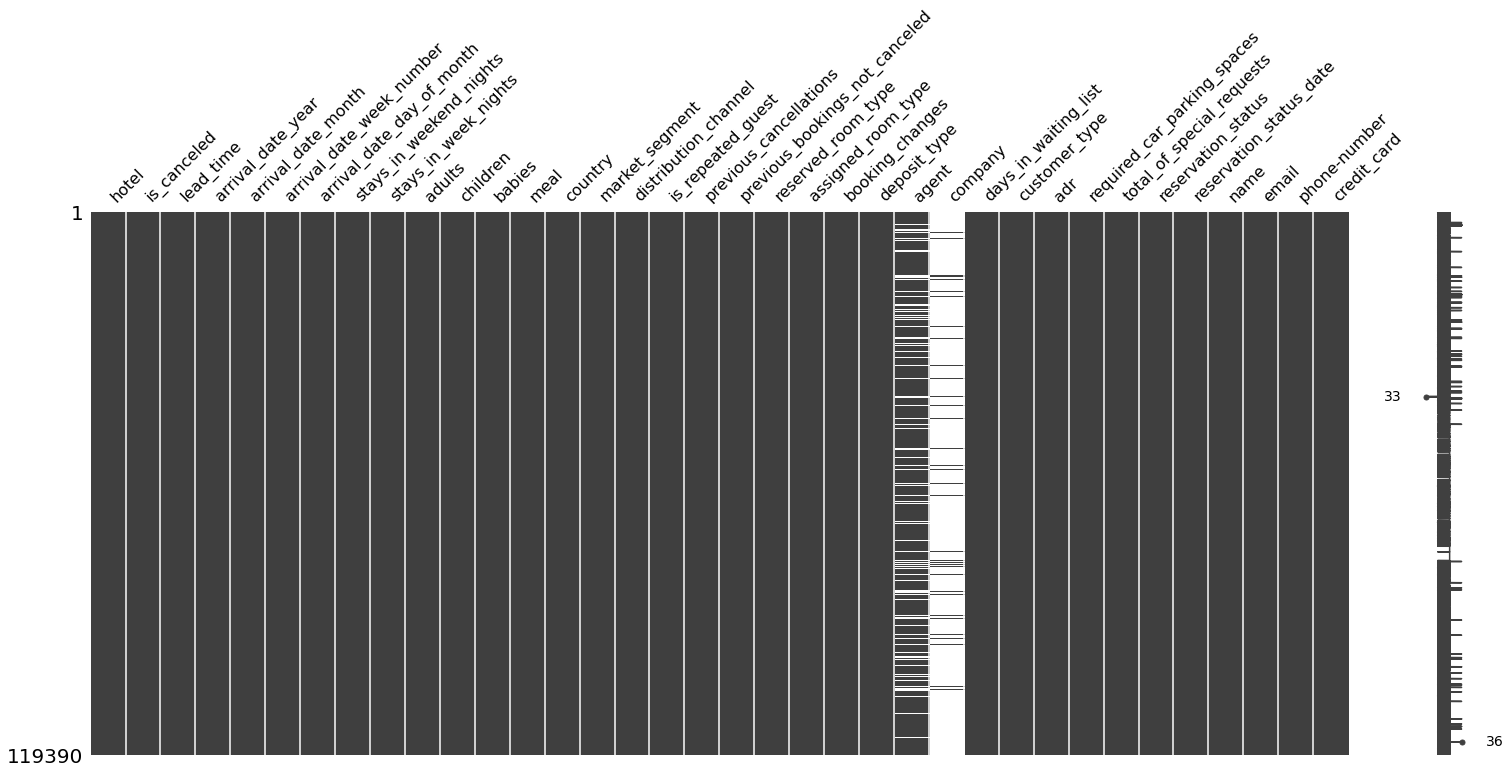

In [ ]:
msno.matrix(df)

In [ ]:
# Remover la columna company ya que está prácticamente vacía.
df.drop(columns=['company'], inplace = True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# La variable 'children' debe ser integer.
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
# Se remueven los NaNs para transformarla de float a int.
df['children'].isna().sum()


4

In [ ]:
df=df.dropna(subset=['children'])

In [ ]:
len(df)

119386

In [ ]:
df['children'].isna().sum()

0

In [ ]:
df['children'] = df['children'].astype(int)

In [ ]:
df['children'].value_counts()

0     110796
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

In [ ]:
# La variable agent se tranforma en str.

In [ ]:
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119386, dtype: float64

In [ ]:
df['agent'].isna().sum()

16338

In [ ]:
df['agent'].map(type).unique().tolist()

[float]

In [ ]:
df['agent'] = df['agent'].astype(str)

In [ ]:
df['agent']

0           nan
1           nan
2           nan
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119386, dtype: object

In [ ]:
# Remover la parte decimal.

In [ ]:
df['agent'] = df['agent'].map( lambda x: x[:-2] if x !='nan' else x )

In [ ]:
# Reemplazar los nan por NAN.

In [ ]:
df.replace('nan', np.nan, inplace=True)

In [ ]:
df['agent']

0         NaN
1         NaN
2         NaN
3         304
4         240
         ... 
119385    394
119386      9
119387      9
119388     89
119389      9
Name: agent, Length: 119386, dtype: object

In [ ]:
for d in df.columns:
    print( d , df[d].map(type).unique().tolist()  , "\n"*1 )

hotel [<class 'str'>] 

is_canceled [<class 'int'>] 

lead_time [<class 'int'>] 

arrival_date_year [<class 'int'>] 

arrival_date_month [<class 'str'>] 

arrival_date_week_number [<class 'int'>] 

arrival_date_day_of_month [<class 'int'>] 

stays_in_weekend_nights [<class 'int'>] 

stays_in_week_nights [<class 'int'>] 

adults [<class 'int'>] 

children [<class 'int'>] 

babies [<class 'int'>] 

meal [<class 'str'>] 

country [<class 'str'>, <class 'float'>] 

market_segment [<class 'str'>] 

distribution_channel [<class 'str'>] 

is_repeated_guest [<class 'int'>] 

previous_cancellations [<class 'int'>] 

previous_bookings_not_canceled [<class 'int'>] 

reserved_room_type [<class 'str'>] 

assigned_room_type [<class 'str'>] 

booking_changes [<class 'int'>] 

deposit_type [<class 'str'>] 

agent [<class 'float'>, <class 'str'>] 

days_in_waiting_list [<class 'int'>] 

customer_type [<class 'str'>] 

adr [<class 'float'>] 

required_car_parking_spaces [<class 'int'>] 

total_of_specia

# Análisis Exploratorio

In [ ]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322


In [ ]:
len(df)

119386

In [ ]:
# No hay registros repetidos
df.duplicated().sum()

0

In [ ]:
# Se agrega una columna para incorporar un id.

In [ ]:
df['id'] = df.index + 1

In [ ]:
df = df[ ['id'] + [ col for col in df.columns if col != 'id' ] ]

In [ ]:
df.tail()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,119386,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,119387,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,119388,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,119389,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,119390,City Hotel,0,205,2017,August,35,29,2,7,2,0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


## Variables

In [ ]:
df.head(1)

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322


In [ ]:
# Clasificación de variables discretas y continuas.

In [ ]:
um = ['id']
vard = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
varc = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
tgt = ['is_canceled']

In [ ]:
len(vard) + len(um) + len(varc) + len(tgt)

36

In [ ]:
len(df.columns)

36

## Variables Discretas

### Reemplazo de NaN por "SIN CATEGORIA"

In [ ]:
for v in vard:
    df[v] = df[v].fillna('SIN CATEGORIA')

In [ ]:
df['agent']

0         SIN CATEGORIA
1         SIN CATEGORIA
2         SIN CATEGORIA
3                   304
4                   240
              ...      
119385              394
119386                9
119387                9
119388               89
119389                9
Name: agent, Length: 119386, dtype: object

### Frecuencias

In [ ]:
def frecuencias(df, var):
    if type(var) != list:
        var = [var]
    for v in var:
        aux = df[v].value_counts().to_frame().rename(columns = {v:'FA'})
        aux['FR'] = aux['FA']/aux['FA'].sum()
        aux[['FAA', 'FRA']] = aux.apply(np.cumsum)
        print(f"Tabla de frecuencias para la variable {v} \n")
        print(aux, "\n")

In [ ]:
for v in vard:
    frecuencias(df,v)

Tabla de frecuencias para la variable hotel 

                 FA       FR     FAA      FRA
City Hotel    79326  0.66445   79326  0.66445
Resort Hotel  40060  0.33555  119386  1.00000 

Tabla de frecuencias para la variable arrival_date_year 

         FA        FR     FAA       FRA
2016  56707  0.474989   56707  0.474989
2017  40687  0.340802   97394  0.815791
2015  21992  0.184209  119386  1.000000 

Tabla de frecuencias para la variable arrival_date_month 

              FA        FR     FAA       FRA
August     13873  0.116203   13873  0.116203
July       12661  0.106051   26534  0.222254
May        11791  0.098764   38325  0.321018
October    11160  0.093478   49485  0.414496
April      11089  0.092884   60574  0.507379
June       10939  0.091627   71513  0.599007
September  10508  0.088017   82021  0.687024
March       9794  0.082036   91815  0.769060
February    8068  0.067579   99883  0.836639
November    6794  0.056908  106677  0.893547
December    6780  0.056791  113457  0.95

Tabla de frecuencias para la variable name 

                   FA        FR     FAA       FRA
Michael Johnson    48  0.000402      48  0.000402
Robert Smith       48  0.000402      96  0.000804
Michael Smith      47  0.000394     143  0.001198
John Smith         46  0.000385     189  0.001583
Christopher Smith  44  0.000369     233  0.001952
...                ..       ...     ...       ...
Jimmy Griffin       1  0.000008  119382  0.999966
Colleen Kelly       1  0.000008  119383  0.999975
Lucas Young         1  0.000008  119384  0.999983
Brendan Martinez    1  0.000008  119385  0.999992
Ariana Michael      1  0.000008  119386  1.000000

[81501 rows x 4 columns] 

Tabla de frecuencias para la variable email 

                               FA        FR     FAA       FRA
Michael.C@gmail.com             6  0.000050       6  0.000050
David.M@zoho.com                5  0.000042      11  0.000092
Ashley_W@yahoo.com              5  0.000042      16  0.000134
James.M@mail.com                5

### Normalización

In [ ]:
def normalizacion(df, v, umbral):

    aux = df[v].value_counts(True).to_frame()
    aux[f'norm_{v}'] = np.where(aux[v] < umbral , 'CATEG_PEQUENAS', aux.index )
    moda = aux.head(1)[f'norm_{v}'].values[0]
    if aux.loc[aux[f'norm_{v}'] == 'CATEG_PEQUENAS'][v].sum () < umbral:
        aux[f'norm_{v}'].replace({'CATEG_PEQUENAS':moda}, inplace = True)

    aux.drop(v, axis=1, inplace=True)
    aux.reset_index(inplace=True)

    return df.merge(aux, left_on=v, right_on = 'index', how = 'inner').drop('index', axis = 1)

In [ ]:
for v in vard:
    df = normalizacion(df, v, 0.03)

In [ ]:
df.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,norm_hotel,norm_arrival_date_year,norm_arrival_date_month,norm_arrival_date_week_number,norm_arrival_date_day_of_month,norm_meal,norm_country,norm_market_segment,norm_distribution_channel,norm_is_repeated_guest,norm_reserved_room_type,norm_assigned_room_type,norm_deposit_type,norm_agent,norm_customer_type,norm_reservation_status,norm_reservation_status_date,norm_name,norm_email,norm_phone-number,norm_credit_card
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,SIN CATEGORIA,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,Resort Hotel,2015,July,CATEG_PEQUENAS,1,BB,PRT,Direct,Direct,0,CATEG_PEQUENAS,CATEG_PEQUENAS,No Deposit,SIN CATEGORIA,Transient,Check-Out,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS
1,100574,City Hotel,0,199,2016,October,44,28,0,2,2,0,0,BB,FRA,Groups,TA/TO,0,0,0,A,A,0,No Deposit,29,0,Transient-Party,95.0,0,0,Check-Out,2016-10-30,Brett Taylor,Taylor.Brett@hotmail.com,511-823-8862,************4322,City Hotel,2016,October,CATEG_PEQUENAS,28,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,CATEG_PEQUENAS,Transient-Party,Check-Out,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS
2,96292,City Hotel,0,1,2017,August,35,29,0,2,1,0,0,BB,PRT,Corporate,Corporate,1,0,6,A,A,0,No Deposit,SIN CATEGORIA,0,Transient,67.0,0,3,Check-Out,2017-08-31,Jeffrey Reyes,Reyes_Jeffrey84@hotmail.com,687-575-0362,************4322,City Hotel,2017,August,CATEG_PEQUENAS,CATEG_PEQUENAS,BB,PRT,Corporate,Corporate,1,A,A,No Deposit,SIN CATEGORIA,Transient,Check-Out,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS
3,17983,Resort Hotel,1,289,2015,November,47,20,1,2,2,0,0,FB,PRT,Groups,TA/TO,0,1,0,A,A,0,No Deposit,134,0,Transient-Party,69.0,0,0,Canceled,2015-10-29,Paul Smith,Paul_S@zoho.com,200-992-8667,************4322,Resort Hotel,2015,November,CATEG_PEQUENAS,20,BB,PRT,Groups,TA/TO,0,A,A,No Deposit,CATEG_PEQUENAS,Transient-Party,Canceled,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS
4,97790,City Hotel,0,12,2016,September,39,19,1,1,2,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,159.0,0,0,Check-Out,2016-09-21,Andrew Watson,Andrew.Watson@comcast.net,349-820-4000,************4322,City Hotel,2016,September,CATEG_PEQUENAS,19,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,A,A,No Deposit,9,Transient,Check-Out,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS,CATEG_PEQUENAS


In [ ]:
varn = df.filter(like='norm_').columns.tolist()
varn

['norm_hotel',
 'norm_arrival_date_year',
 'norm_arrival_date_month',
 'norm_arrival_date_week_number',
 'norm_arrival_date_day_of_month',
 'norm_meal',
 'norm_country',
 'norm_market_segment',
 'norm_distribution_channel',
 'norm_is_repeated_guest',
 'norm_reserved_room_type',
 'norm_assigned_room_type',
 'norm_deposit_type',
 'norm_agent',
 'norm_customer_type',
 'norm_reservation_status',
 'norm_reservation_status_date',
 'norm_name',
 'norm_email',
 'norm_phone-number',
 'norm_credit_card']

In [ ]:
frecuencias(df,varn)

Tabla de frecuencias para la variable norm_hotel 

                 FA       FR     FAA      FRA
City Hotel    79326  0.66445   79326  0.66445
Resort Hotel  40060  0.33555  119386  1.00000 

Tabla de frecuencias para la variable norm_arrival_date_year 

         FA        FR     FAA       FRA
2016  56707  0.474989   56707  0.474989
2017  40687  0.340802   97394  0.815791
2015  21992  0.184209  119386  1.000000 

Tabla de frecuencias para la variable norm_arrival_date_month 

              FA        FR     FAA       FRA
August     13873  0.116203   13873  0.116203
July       12661  0.106051   26534  0.222254
May        11791  0.098764   38325  0.321018
October    11160  0.093478   49485  0.414496
April      11089  0.092884   60574  0.507379
June       10939  0.091627   71513  0.599007
September  10508  0.088017   82021  0.687024
March       9794  0.082036   91815  0.769060
February    8068  0.067579   99883  0.836639
November    6794  0.056908  106677  0.893547
December    6780  0.05679

### Unarias

In [ ]:
v_unarias = [ v for v, conteo in zip(varn, [df[v].unique().shape[0] for v in varn] ) if conteo ==1 ]

In [ ]:
v_unarias

['norm_arrival_date_week_number',
 'norm_reservation_status_date',
 'norm_name',
 'norm_email',
 'norm_phone-number',
 'norm_credit_card']

In [ ]:
len(varn)

21

In [ ]:
varn = [v for v in varn if v not in v_unarias]

In [ ]:
len(varn), varn

(15,
 ['norm_hotel',
  'norm_arrival_date_year',
  'norm_arrival_date_month',
  'norm_arrival_date_day_of_month',
  'norm_meal',
  'norm_country',
  'norm_market_segment',
  'norm_distribution_channel',
  'norm_is_repeated_guest',
  'norm_reserved_room_type',
  'norm_assigned_room_type',
  'norm_deposit_type',
  'norm_agent',
  'norm_customer_type',
  'norm_reservation_status'])

## Variables Continuas

### Análisis Univariado

In [ ]:
varc

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
X = df[varc].copy()

In [ ]:
X.shape

(119386, 13)

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

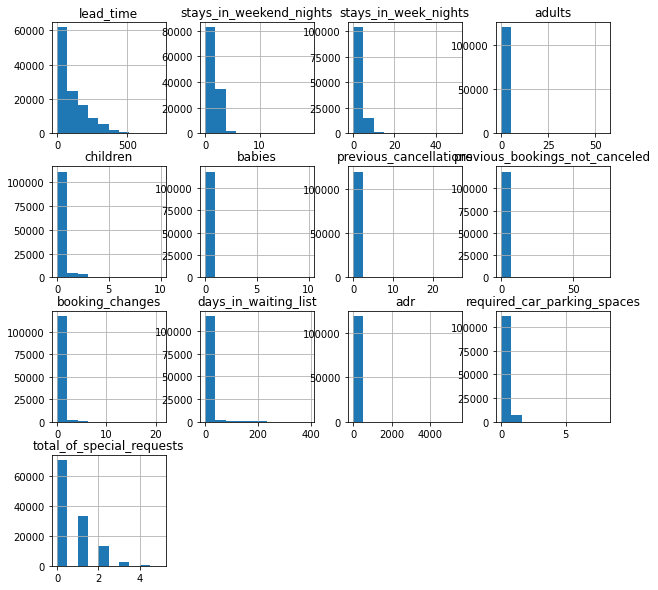

In [ ]:
X[varc].hist(figsize=(10,10))

In [ ]:
X.describe(percentiles=[0.01,0.1,0.9,0.99])

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,104.014801,0.927605,2.500310,1.856390,0.103890,0.007949,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,106.863286,0.998618,1.908289,0.579261,0.398561,0.097438,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
90%,265.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,164.000000,0.000000,2.000000
99%,444.000000,4.000000,10.000000,3.000000,2.000000,0.000000,1.000000,3.000000,3.000000,75.000000,252.000000,1.000000,3.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### Valores Ausentes

In [ ]:
miss = 1 - X[varc].describe().T[['count']] / len(X)
miss

,count
lead_time,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0
children,0.0
babies,0.0
previous_cancellations,0.0
previous_bookings_not_canceled,0.0
booking_changes,0.0
days_in_waiting_list,0.0


In [ ]:
# No hay valores ausentes

### Varianza

In [ ]:
vt = VarianceThreshold(threshold=1)
vt.fit(X[varc])

VarianceThreshold(threshold=1)

In [ ]:
sin_varianza = [v for v,u in zip( varc , vt.get_support() ) if not(u) ]
print(sin_varianza)

X.drop(sin_varianza, axis=1 , inplace=True)
varc = [v for v in varc if v not in sin_varianza]
varc

['stays_in_weekend_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']


['lead_time',
 'stays_in_week_nights',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'adr']

### Valores Extremos

#### Cerca Percentil

In [ ]:
ext = X[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index()
for v, li, ls in ext.values:
    X[f'ol_{v}'] = ((X[v]<li) | (X[v]>ls)).astype(int)

X['ext'] = X.filter(like='ol').max(axis=1)
X.drop(X.filter(like='ol_').columns, axis=1, inplace=True)

In [ ]:
X['ext'].value_counts(True)

0    0.957675
1    0.042325
Name: ext, dtype: float64

#### Cerca intercuartil

In [ ]:
# k=2 (moderado), k=3 (fuerte)
k = 2
ext = X[varc].describe(percentiles=[0.25,0.75]).T[['25%','75%','mean']].reset_index()
ext['IQR'] = ext['75%'] - ext['25%']
ext['li']  = ext['mean'] - k*ext['IQR']
ext['ls']  = ext['mean'] + k*ext['IQR']
ext = ext[['index','li','ls']]

In [ ]:
for v, li, ls in ext.values:
    X[f'ol_{v}'] = ((X[v]<li) | (X[v]>ls)  ).astype(int)

X['ext_iqr'] = X.filter(like='ol').max(axis=1)
X.drop(X.filter(like='ol_').columns, axis=1, inplace=True)
X['ext_iqr'].value_counts(True)

1    1.0
Name: ext_iqr, dtype: float64

+ **Agregar la unidad muestral antes de la eliminación de registros.**

In [ ]:
print("Dimensiones:", X.shape, df.shape)

Dimensiones: (119386, 7) (119386, 57)


In [ ]:
X[um] = df[um]

In [ ]:
X.head(2)

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr,ext,ext_iqr,id
0,342,0,0,0,0.0,0,1,1
1,199,2,0,0,95.0,0,1,100574


+ **Eliminar valores extremos**

In [ ]:
X = X.loc[X['ext'] == 0].reset_index(drop=True).drop(['ext','ext_iqr'],axis=1)

In [ ]:
print(X.shape)

(114333, 6)


In [ ]:
X.describe(percentiles=[0.01,0.1,0.9,0.99])

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr,id
count,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000
mean,99.759440,2.462762,0.032021,0.900239,100.852200,59959.309526
std,98.865893,1.718848,0.241784,6.574790,44.806078,34576.800887
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,1165.320000
10%,3.000000,1.000000,0.000000,0.000000,50.052000,11811.200000
50%,68.000000,2.000000,0.000000,0.000000,95.000000,60235.000000
90%,255.000000,5.000000,0.000000,0.000000,161.100000,107561.800000
99%,391.000000,9.000000,1.000000,44.000000,230.000000,118120.680000
max,444.000000,10.000000,3.000000,75.000000,252.000000,119390.000000


In [ ]:
X.head()

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr,id
0,342,0,0,0,0.0,1
1,199,2,0,0,95.0,100574
2,289,2,0,0,69.0,17983
3,12,1,0,0,159.0,97790
4,4,2,0,0,64.0,18504


### Análisis Bivariado

In [ ]:
X[varc].corr()

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr
lead_time,1.000000,0.207545,-0.102460,0.099242,-0.044474
stays_in_week_nights,0.207545,1.000000,-0.071707,-0.016010,0.082742
previous_bookings_not_canceled,-0.102460,-0.071707,1.000000,-0.012494,-0.097459
days_in_waiting_list,0.099242,-0.016010,-0.012494,1.000000,-0.027814
adr,-0.044474,0.082742,-0.097459,-0.027814,1.000000


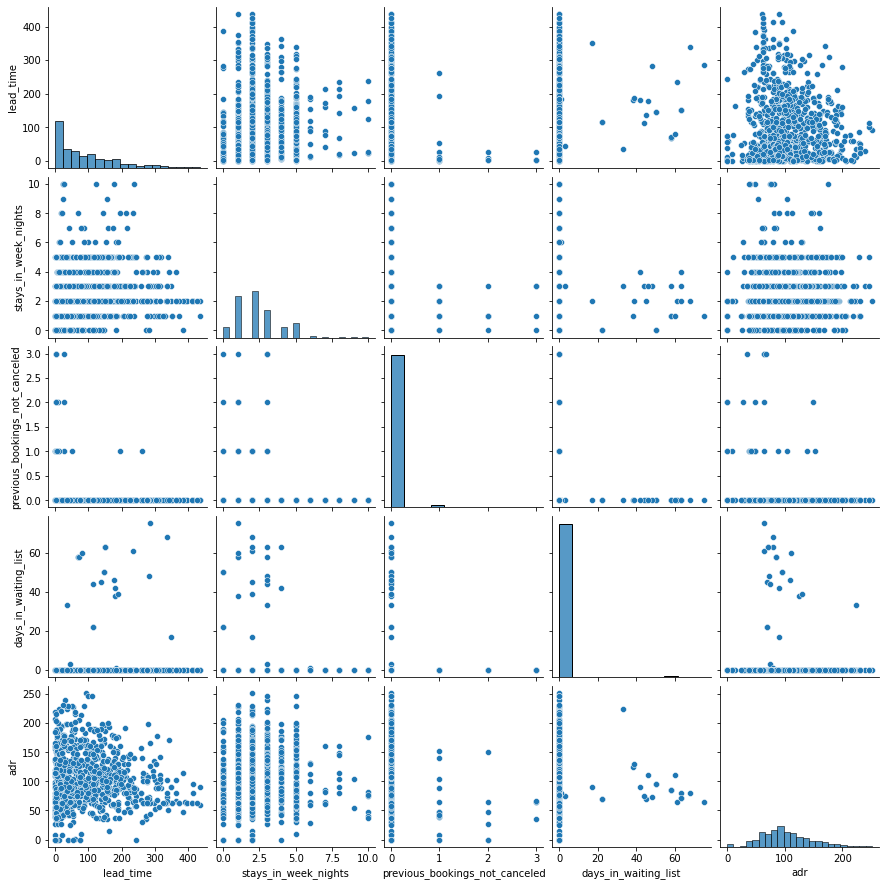

In [ ]:
sns.pairplot(X[varc].sample(1000))

### Multicolinealidad

In [ ]:
vc = VarClusHi( df=X[varc] , feat_list=varc  )

In [ ]:
vc.varclus()

In [ ]:
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio'] , ascending=[1,1]).reset_index(drop=True)
rs['id'] = rs.groupby('Cluster').cumcount()+1

In [ ]:
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,lead_time,0.603772,0.009849,0.400169,1
1,0,stays_in_week_nights,0.603772,0.010868,0.400581,2
2,1,adr,0.548729,0.000774,0.451620,1
3,1,previous_bookings_not_canceled,0.548729,0.012560,0.457011,2
4,2,days_in_waiting_list,1.000000,0.002868,0.000000,1


In [ ]:
varc = rs.loc[ rs['id'] == 1 ]['Variable'].tolist()

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'adr'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:>]], dtype=object)

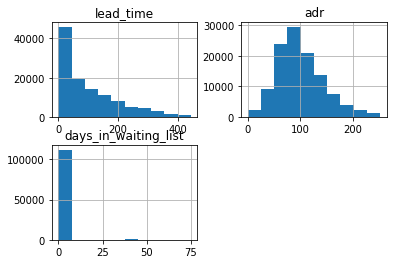

In [ ]:
X[varc].hist()

### Discretizar

In [ ]:
varc

['lead_time', 'adr', 'days_in_waiting_list']

In [ ]:
def discretizacion(df, v, k):

    kb = KBinsDiscretizer( n_bins = k, encode='ordinal', strategy='quantile')
    kb.fit(X[[v]])
    df[f'd_{v}_{k}'] = pd.cut( X[v], bins=kb.bin_edges_[0], include_lowest=True).astype(str)

    return X

In [ ]:
for v in varc:
    for k in range(2,6):
        X = discretizacion(X,v,k)

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width a

In [ ]:
X.shape

(114333, 18)

In [ ]:
X.head()

,lead_time,stays_in_week_nights,previous_bookings_not_canceled,days_in_waiting_list,adr,id,d_lead_time_2,d_lead_time_3,d_lead_time_4,d_lead_time_5,d_adr_2,d_adr_3,d_adr_4,d_adr_5,d_days_in_waiting_list_2,d_days_in_waiting_list_3,d_days_in_waiting_list_4,d_days_in_waiting_list_5
0,342,0,0,0,0.0,1,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(-0.001, 65.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]"
1,199,2,0,0,95.0,100574,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(79.05, 114.0]","(70.0, 95.0]","(85.248, 105.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]"
2,289,2,0,0,69.0,17983,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(65.0, 85.248]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]"
3,12,1,0,0,159.0,97790,"(-0.001, 68.0]","(-0.001, 32.0]","(-0.001, 18.0]","(-0.001, 12.0]","(95.0, 252.0]","(114.0, 252.0]","(126.0, 252.0]","(134.3, 252.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]"
4,4,2,0,0,64.0,18504,"(-0.001, 68.0]","(-0.001, 32.0]","(-0.001, 18.0]","(-0.001, 12.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(-0.001, 65.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]"


In [ ]:
vari = X.filter(like='d_').columns.to_list()

In [ ]:
len(vari), vari

(13,
 ['lead_time',
  'd_lead_time_2',
  'd_lead_time_3',
  'd_lead_time_4',
  'd_lead_time_5',
  'd_adr_2',
  'd_adr_3',
  'd_adr_4',
  'd_adr_5',
  'd_days_in_waiting_list_2',
  'd_days_in_waiting_list_3',
  'd_days_in_waiting_list_4',
  'd_days_in_waiting_list_5'])

### Función-IV

In [ ]:
def calcula_iv(df, v, tgt):
    aux = df.pivot_table( index = v,
                           columns = tgt,
                            values = um[0],
                            aggfunc = 'count',
                            fill_value = 0 )

    aux[list(range(2))] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1])
    aux['iv'] = (aux[0] - aux[1]) * aux['w']

    return v, aux['iv'].sum()

### Poder Predictivo

#### Construir X, y

In [ ]:
X = X[um+vari].merge(  df[um+varn] , on = um , how='left' ).reset_index(drop=True)
y = X[um].merge(df[um+tgt], on=um, how='left').reset_index(drop=True)

In [ ]:
X.head()

,id,lead_time,d_lead_time_2,d_lead_time_3,d_lead_time_4,d_lead_time_5,d_adr_2,d_adr_3,d_adr_4,d_adr_5,d_days_in_waiting_list_2,d_days_in_waiting_list_3,d_days_in_waiting_list_4,d_days_in_waiting_list_5,norm_hotel,norm_arrival_date_year,norm_arrival_date_month,norm_arrival_date_day_of_month,norm_meal,norm_country,norm_market_segment,norm_distribution_channel,norm_is_repeated_guest,norm_reserved_room_type,norm_assigned_room_type,norm_deposit_type,norm_agent,norm_customer_type,norm_reservation_status
0,1,342,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(-0.001, 65.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2015,July,1,BB,PRT,Direct,Direct,0,CATEG_PEQUENAS,CATEG_PEQUENAS,No Deposit,SIN CATEGORIA,Transient,Check-Out
1,100574,199,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(79.05, 114.0]","(70.0, 95.0]","(85.248, 105.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2016,October,28,BB,FRA,Groups,TA/TO,0,A,A,No Deposit,CATEG_PEQUENAS,Transient-Party,Check-Out
2,17983,289,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(65.0, 85.248]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2015,November,20,BB,PRT,Groups,TA/TO,0,A,A,No Deposit,CATEG_PEQUENAS,Transient-Party,Canceled
3,97790,12,"(-0.001, 68.0]","(-0.001, 32.0]","(-0.001, 18.0]","(-0.001, 12.0]","(95.0, 252.0]","(114.0, 252.0]","(126.0, 252.0]","(134.3, 252.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2016,September,19,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,A,A,No Deposit,9,Transient,Check-Out
4,18504,4,"(-0.001, 68.0]","(-0.001, 32.0]","(-0.001, 18.0]","(-0.001, 12.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(-0.001, 65.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2015,November,20,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,D,D,No Deposit,240,Transient,Check-Out


In [ ]:
y.head()

,id,is_canceled
0,1,0
1,100574,0
2,17983,1
3,97790,0
4,18504,0


In [ ]:
X.shape, y.shape

((114333, 29), (114333, 2))

+ **Separar Datos**

In [ ]:
Xt , Xv , yt , yv = train_test_split(X, y, train_size=0.7, random_state=2000 )

In [ ]:
Xt.shape, yt.shape , Xv.shape , yv.shape

((80033, 29), (80033, 2), (34300, 29), (34300, 2))

In [ ]:
Xt = Xt.merge( yt, on=um, how='inner' ).reset_index(drop=True)

In [ ]:
Xt.head()

,id,lead_time,d_lead_time_2,d_lead_time_3,d_lead_time_4,d_lead_time_5,d_adr_2,d_adr_3,d_adr_4,d_adr_5,d_days_in_waiting_list_2,d_days_in_waiting_list_3,d_days_in_waiting_list_4,d_days_in_waiting_list_5,norm_hotel,norm_arrival_date_year,norm_arrival_date_month,norm_arrival_date_day_of_month,norm_meal,norm_country,norm_market_segment,norm_distribution_channel,norm_is_repeated_guest,norm_reserved_room_type,norm_assigned_room_type,norm_deposit_type,norm_agent,norm_customer_type,norm_reservation_status,is_canceled
0,10860,351,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(-0.001, 95.0]","(79.05, 114.0]","(70.0, 95.0]","(65.0, 85.248]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2017,April,8,HB,PRT,Groups,TA/TO,0,D,D,No Deposit,CATEG_PEQUENAS,Transient-Party,Canceled,1
1,64573,52,"(-0.001, 68.0]","(32.0, 120.0]","(18.0, 68.0]","(44.0, 97.0]","(-0.001, 95.0]","(79.05, 114.0]","(70.0, 95.0]","(65.0, 85.248]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2017,March,13,BB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,CATEG_PEQUENAS,Transient,Canceled,1
2,103104,18,"(-0.001, 68.0]","(-0.001, 32.0]","(-0.001, 18.0]","(12.0, 44.0]","(-0.001, 95.0]","(79.05, 114.0]","(70.0, 95.0]","(65.0, 85.248]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2016,December,11,BB,PRT,Offline TA/TO,TA/TO,0,A,A,No Deposit,CATEG_PEQUENAS,Transient-Party,Check-Out,0
3,7230,324,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(95.0, 252.0]","(114.0, 252.0]","(126.0, 252.0]","(105.3, 134.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2016,July,CATEG_PEQUENAS,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,A,A,No Deposit,240,Transient,Check-Out,0
4,55688,291,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(179.0, 444.0]","(95.0, 252.0]","(114.0, 252.0]","(95.0, 126.0]","(105.3, 134.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2016,August,19,HB,PRT,Offline TA/TO,TA/TO,0,A,A,Non Refund,CATEG_PEQUENAS,Transient,Canceled,1


#### Mejores Variables Discretizadas

In [ ]:
iv = pd.DataFrame( map( lambda v: calcula_iv(Xt,v,tgt), vari   ), columns=['variable','iv']  )
iv['raiz'] = iv['variable'].map(lambda x: '_'.join(x.split('_')[1:2] )  )
iv = iv.sort_values(by=['raiz','iv'],ascending=[1,0]).reset_index(drop=True)

#Depurar variables (en caso de que tengan indeterminados)
iv = iv.loc[iv['iv'] != np.inf].reset_index(drop=True)

iv['id'] = iv.groupby('raiz').cumcount()+1
iv = iv.loc[iv['id'] == 1]

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
iv

,variable,iv,raiz,id
0,d_adr_3,0.011125,adr,1
4,d_days_in_waiting_list_2,0.000000,days,1
8,d_lead_time_5,0.464800,lead,1


In [ ]:
besti = iv['variable'].tolist()
len(besti) , besti

(3, ['d_adr_3', 'd_days_in_waiting_list_2', 'd_lead_time_5'])

In [ ]:
X[besti]

,d_adr_3,d_days_in_waiting_list_2,d_lead_time_5
0,"(-0.001, 79.05]","(-0.001, 75.0]","(179.0, 444.0]"
1,"(79.05, 114.0]","(-0.001, 75.0]","(179.0, 444.0]"
2,"(-0.001, 79.05]","(-0.001, 75.0]","(179.0, 444.0]"
3,"(114.0, 252.0]","(-0.001, 75.0]","(-0.001, 12.0]"
4,"(-0.001, 79.05]","(-0.001, 75.0]","(-0.001, 12.0]"
...,...,...,...
114328,"(-0.001, 79.05]","(-0.001, 75.0]","(-0.001, 12.0]"
114329,"(-0.001, 79.05]","(-0.001, 75.0]","(-0.001, 12.0]"
114330,"(79.05, 114.0]","(-0.001, 75.0]","(44.0, 97.0]"
114331,"(114.0, 252.0]","(-0.001, 75.0]","(-0.001, 12.0]"


+ **Separar Datos**

In [ ]:
Xt, Xv,yt,yv = train_test_split(X,y,train_size=0.7)
print(Xt.shape, yt.shape , Xv.shape , yv.shape)

(80033, 29) (80033, 2) (34300, 29) (34300, 2)


In [ ]:
Xt = Xt.merge(yt,on=um,how='inner')

In [ ]:
Xt.shape

(80033, 30)

In [ ]:
Xt.head()

,id,lead_time,d_lead_time_2,d_lead_time_3,d_lead_time_4,d_lead_time_5,d_adr_2,d_adr_3,d_adr_4,d_adr_5,d_days_in_waiting_list_2,d_days_in_waiting_list_3,d_days_in_waiting_list_4,d_days_in_waiting_list_5,norm_hotel,norm_arrival_date_year,norm_arrival_date_month,norm_arrival_date_day_of_month,norm_meal,norm_country,norm_market_segment,norm_distribution_channel,norm_is_repeated_guest,norm_reserved_room_type,norm_assigned_room_type,norm_deposit_type,norm_agent,norm_customer_type,norm_reservation_status,is_canceled
0,108779,64,"(-0.001, 68.0]","(32.0, 120.0]","(18.0, 68.0]","(44.0, 97.0]","(95.0, 252.0]","(79.05, 114.0]","(95.0, 126.0]","(85.248, 105.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2017,March,26,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,D,D,No Deposit,9,Transient,Check-Out,0
1,109955,157,"(68.0, 444.0]","(120.0, 444.0]","(156.0, 444.0]","(97.0, 179.0]","(95.0, 252.0]","(79.05, 114.0]","(95.0, 126.0]","(85.248, 105.3]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2017,April,19,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,A,A,No Deposit,9,Transient,Check-Out,0
2,57684,28,"(-0.001, 68.0]","(-0.001, 32.0]","(18.0, 68.0]","(12.0, 44.0]","(95.0, 252.0]","(114.0, 252.0]","(126.0, 252.0]","(134.3, 252.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2016,September,30,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,CATEG_PEQUENAS,F,No Deposit,9,Transient,Canceled,1
3,117110,37,"(-0.001, 68.0]","(32.0, 120.0]","(18.0, 68.0]","(12.0, 44.0]","(95.0, 252.0]","(114.0, 252.0]","(126.0, 252.0]","(134.3, 252.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",City Hotel,2017,July,27,BB,CATEG_PEQUENAS,Online TA,TA/TO,0,D,D,No Deposit,9,Transient,Check-Out,0
4,23027,42,"(-0.001, 68.0]","(32.0, 120.0]","(18.0, 68.0]","(12.0, 44.0]","(-0.001, 95.0]","(-0.001, 79.05]","(-0.001, 70.0]","(-0.001, 65.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]","(-0.001, 75.0]",Resort Hotel,2016,April,5,HB,DEU,Offline TA/TO,TA/TO,0,A,CATEG_PEQUENAS,No Deposit,CATEG_PEQUENAS,Transient,Check-Out,0


### Mejores Variables Normalizadas

In [ ]:
ivd = pd.DataFrame(map(lambda v:calcula_iv(Xt,v,tgt),varn), columns=['variable','iv'])
ivd

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,variable,iv
0,norm_hotel,0.079214
1,norm_arrival_date_year,0.004001
2,norm_arrival_date_month,0.028330
3,norm_arrival_date_day_of_month,0.012557
4,norm_meal,0.001631
5,norm_country,0.532372
6,norm_market_segment,0.310530
7,norm_distribution_channel,0.137743
8,norm_is_repeated_guest,0.021814
9,norm_reserved_room_type,0.022533


In [ ]:
iv = pd.concat([iv,ivd],ignore_index=True)
iv

,variable,iv,raiz,id
0,d_adr_3,0.011125,adr,1.0
1,d_days_in_waiting_list_2,0.000000,days,1.0
2,d_lead_time_5,0.464800,lead,1.0
3,norm_hotel,0.079214,NaN,NaN
4,norm_arrival_date_year,0.004001,NaN,NaN
5,norm_arrival_date_month,0.028330,NaN,NaN
6,norm_arrival_date_day_of_month,0.012557,NaN,NaN
7,norm_meal,0.001631,NaN,NaN
8,norm_country,0.532372,NaN,NaN
9,norm_market_segment,0.310530,NaN,NaN


In [ ]:
iv = iv.loc[~np.isinf(iv['iv'])].reset_index(drop=True)
iv

,variable,iv,raiz,id
0,d_adr_3,0.011125,adr,1.0
1,d_days_in_waiting_list_2,0.000000,days,1.0
2,d_lead_time_5,0.464800,lead,1.0
3,norm_hotel,0.079214,NaN,NaN
4,norm_arrival_date_year,0.004001,NaN,NaN
5,norm_arrival_date_month,0.028330,NaN,NaN
6,norm_arrival_date_day_of_month,0.012557,NaN,NaN
7,norm_meal,0.001631,NaN,NaN
8,norm_country,0.532372,NaN,NaN
9,norm_market_segment,0.310530,NaN,NaN


In [ ]:
iv.drop(['raiz','id'],axis=1,inplace=True)
iv

,variable,iv
0,d_adr_3,0.011125
1,d_days_in_waiting_list_2,0.000000
2,d_lead_time_5,0.464800
3,norm_hotel,0.079214
4,norm_arrival_date_year,0.004001
5,norm_arrival_date_month,0.028330
6,norm_arrival_date_day_of_month,0.012557
7,norm_meal,0.001631
8,norm_country,0.532372
9,norm_market_segment,0.310530


In [ ]:
iv.sort_values(by='iv',ascending=False)


,variable,iv
14,norm_deposit_type,1.888347
8,norm_country,0.532372
2,d_lead_time_5,0.464800
9,norm_market_segment,0.310530
15,norm_agent,0.204484
13,norm_assigned_room_type,0.175825
10,norm_distribution_channel,0.137743
3,norm_hotel,0.079214
16,norm_customer_type,0.071717
5,norm_arrival_date_month,0.028330


In [ ]:
# Poder predictivo fuerte
best = iv.loc[ (iv['iv'] >= 0.1 ) &  ( iv['iv'] < 0.6) ]['variable'].tolist()

In [ ]:
len(best), best

(6,
 ['d_lead_time_5',
  'norm_country',
  'norm_market_segment',
  'norm_distribution_channel',
  'norm_assigned_room_type',
  'norm_agent'])

## Transformación WOE

In [ ]:
X = X[um + best].reset_index(drop=True)
X.shape , y.shape

((114333, 7), (114333, 2))

+ **Separación de datos**

In [ ]:
Xt, Xv,yt,yv = train_test_split(X,y,train_size=0.7)
print(Xt.shape, yt.shape , Xv.shape , yv.shape)

(80033, 7) (80033, 2) (34300, 7) (34300, 2)


In [ ]:
Xt = Xt.merge(yt,on=um,how='inner')

In [ ]:
Xt.head()

,id,d_lead_time_5,norm_country,norm_market_segment,norm_distribution_channel,norm_assigned_room_type,norm_agent,is_canceled
0,8391,"(12.0, 44.0]",DEU,Online TA,TA/TO,CATEG_PEQUENAS,240,1
1,114423,"(-0.001, 12.0]",CATEG_PEQUENAS,Online TA,TA/TO,D,CATEG_PEQUENAS,0
2,1784,"(97.0, 179.0]",PRT,Online TA,TA/TO,A,240,1
3,58476,"(12.0, 44.0]",PRT,Groups,TA/TO,E,CATEG_PEQUENAS,1
4,30467,"(44.0, 97.0]",FRA,Offline TA/TO,TA/TO,D,CATEG_PEQUENAS,0


In [ ]:
def codificacion_woe(df,v,tgt):

    aux = df.pivot_table(index=v,
                         columns=tgt,
                         values='id',
                         aggfunc='count',
                         fill_value=0)

    aux[list(range(2))] = aux/aux.apply(np.sum)

    aux['w'] = np.log(aux[0]/aux[1])

    aux.drop(range(2),axis=1,inplace=True)

    aux = aux.to_dict()['w']

    return v,aux

### Mapa Woe

In [ ]:
mapa_woe = list(map(lambda v: codificacion_woe(Xt,v,tgt)  , best  ))

In [ ]:
mapa_woe

[('d_lead_time_5',
  {'(-0.001, 12.0]': 1.4188988229008592,
   '(12.0, 44.0]': 0.19218740864846215,
   '(179.0, 444.0]': -0.7874774341594011,
   '(44.0, 97.0]': -0.10981488757317419,
   '(97.0, 179.0]': -0.3343812089511329}),
 ('norm_country',
  {'CATEG_PEQUENAS': 0.4742796270545135,
   'DEU': 1.0586806165686315,
   'ESP': 0.539605906968791,
   'FRA': 0.9543156096552167,
   'GBR': 0.8164384054753367,
   'ITA': 0.024753691232383704,
   'PRT': -0.8083920228168738}),
 ('norm_market_segment',
  {'Corporate': 0.7851861598643906,
   'Direct': 1.1839027837611853,
   'Groups': -0.9769367947487103,
   'Offline TA/TO': 0.1424186984224563,
   'Online TA': 0.02701647274370379}),
 ('norm_distribution_channel',
  {'Corporate': 0.577167418263155,
   'Direct': 1.0153320635706353,
   'TA/TO': -0.15279696271447227}),
 ('norm_assigned_room_type',
  {'A': -0.30855672133245177,
   'CATEG_PEQUENAS': 0.6759809263744503,
   'D': 0.5457424698781435,
   'E': 0.5670840591565843,
   'F': 0.6344748627983845}),
 ('

In [ ]:
for v,mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [ ]:
Xt.shape, Xt.dropna().shape, Xv.shape, Xv.dropna().shape

((80033, 14), (80033, 14), (34300, 13), (34300, 13))

In [ ]:
varw = Xt.filter(like='w_').columns.tolist()

In [ ]:
len(varw), varw

(6,
 ['w_d_lead_time_5',
  'w_norm_country',
  'w_norm_market_segment',
  'w_norm_distribution_channel',
  'w_norm_assigned_room_type',
  'w_norm_agent'])

# TAD

In [ ]:
tad = Xt[ um + varw].merge(yt , on=um, how='inner').reset_index(drop=True)

In [ ]:
tad

,id,w_d_lead_time_5,w_norm_country,w_norm_market_segment,w_norm_distribution_channel,w_norm_assigned_room_type,w_norm_agent,is_canceled
0,8391,0.192187,1.058681,0.027016,-0.152797,0.675981,-0.090910,1
1,114423,1.418899,0.474280,0.027016,-0.152797,0.545742,0.157261,0
2,1784,-0.334381,-0.808392,0.027016,-0.152797,-0.308557,-0.090910,1
3,58476,0.192187,-0.808392,-0.976937,-0.152797,0.567084,0.157261,1
4,30467,-0.109815,0.954316,0.142419,-0.152797,0.545742,0.157261,0
...,...,...,...,...,...,...,...,...
80028,71168,-0.334381,0.954316,0.027016,-0.152797,0.634475,-0.189502,1
80029,33301,0.192187,0.816438,0.785186,0.577167,-0.308557,0.507570,0
80030,90492,-0.334381,0.816438,0.142419,-0.152797,0.545742,0.157261,0
80031,44881,0.192187,-0.808392,0.027016,-0.152797,-0.308557,0.157261,0


In [ ]:
tad['is_canceled'].value_counts()

0    50636
1    29397
Name: is_canceled, dtype: int64

In [ ]:
pd.to_pickle(tad , 'MARTINEZ_ZAPATA_DANIEL_practica2_m2.pkl' , protocol=4  )

# Regresión Logística

In [ ]:
modelo = LogisticRegression()

In [ ]:
#Aqui se entrena el modelo
modelo.fit( Xt[varw] , yt[tgt] )

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
modelo.intercept_, modelo.coef_

(array([-0.49446582]),
 array([[-0.99702603, -1.17426503, -0.13169127, -0.41481556, -0.55071753,
         -0.61273363]]))

In [ ]:
modelo.predict_proba(Xv[varw])

array([[0.80318315, 0.19681685],
       [0.73063088, 0.26936912],
       [0.59128552, 0.40871448],
       ...,
       [0.64885534, 0.35114466],
       [0.73503628, 0.26496372],
       [0.74393421, 0.25606579]])

In [ ]:
v_sol = modelo.predict(Xv[varw])

In [ ]:
unico , counts = np.unique(v_sol , return_counts=True)
dict(zip( unico , counts ))

{0: 24463, 1: 9837}

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

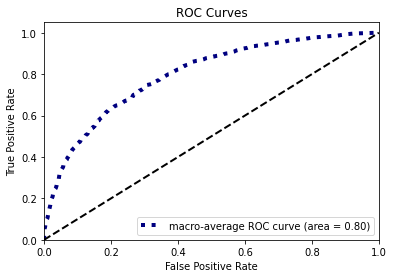

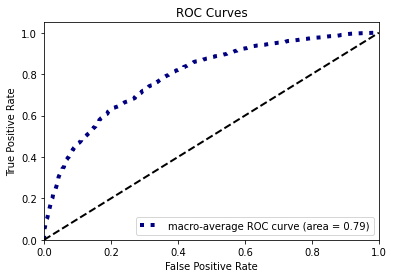

In [ ]:
plot_roc_curve(  y_true=yt[tgt]  , y_probas=modelo.predict_proba(Xt[varw]) , curves='macro'  )
plot_roc_curve(  y_true=yv[tgt]  , y_probas=modelo.predict_proba(Xv[varw]) , curves='macro'  )

In [ ]:
def metricas(model,Xv,yv):
    print(" Métricas para modelo de clasificación: \n")

    print(" Valor ROC : %.3f"   %roc_auc_score( y_score=model.predict_proba(Xv)[:,1] , y_true=yv  )   )

    print(" Valor ACC : %.3f\n" %accuracy_score( y_pred=model.predict(Xv) , y_true=yv) )

    print(" Matriz de confusión: ", "\n", confusion_matrix(y_pred=model.predict(Xv) , y_true=yv ) )

In [ ]:
metricas( modelo , Xv[varw] , yv[tgt] )

 Métricas para modelo de clasificación: 

 Valor ROC : 0.793
 Valor ACC : 0.760

 Matriz de confusión:  
 [[18950  2713]
 [ 5513  7124]]


In [ ]:
yv['y^'] = v_sol

In [ ]:
yv.sample(30)

,id,is_canceled,y^
61807,113274,0,0
100279,74372,1,1
106049,4738,0,0
44251,116626,0,0
47365,86738,0,0
59678,82544,0,0
36234,2352,0,0
33015,22124,0,0
156,83293,0,0
29314,87172,0,0


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [ ]:
metricas(modelo,Xt[varw],yt[tgt])

 Roc Validate: 0.796
 Acc Validate: 0.761
 Matrix Conf Validate:  
 [[44179  6457]
 [12659 16738]]


In [ ]:
metricas(modelo,Xv[varw],yv[tgt])

 Roc Validate: 0.793
 Acc Validate: 0.760
 Matrix Conf Validate:  
 [[18950  2713]
 [ 5513  7124]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_pred=modelo.predict(Xv[varw]),y_true=yv[tgt])

0.6339770401352676

In [ ]:
f1_score(y_pred=modelo.predict(Xv[varw]),y_true=yv[tgt],pos_label=0)

0.8216624029831332

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(yv[tgt],modelo.predict(Xv[varw])))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     21663
           1       0.72      0.56      0.63     12637

    accuracy                           0.76     34300
   macro avg       0.75      0.72      0.73     34300
weighted avg       0.76      0.76      0.75     34300



# Transformación a Scoring

In [ ]:
PDO = 25
base_score = 700
base_oddds = 2

factor = PDO / np.log(2)

offset = base_score - factor *np.log(base_oddds)

print(factor, offset)

36.06737602222409 675.0


In [ ]:
betas = modelo.coef_[0].tolist()
beta0 = modelo.intercept_[0]

In [ ]:
n = len(betas)
n

6

In [ ]:
for v, beta in zip(varw, betas):
    #print(v, beta)
    Xt[f'p_{v}'] = np.ceil( (-Xt[v]*beta+beta0/n ) * factor + offset / n )
    Xv[f'p_{v}'] = np.ceil( (-Xv[v]*beta+beta0/n ) * factor + offset / n )

In [ ]:
varp = Xt.filter(like='p_').columns.tolist()

In [ ]:
varp = [v for v in varp if v[:2] == 'p_']

In [ ]:
Xt['score'] = Xt[varp].sum(axis=1)
Xv['score'] = Xv[varp].sum(axis=1)

/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dmz/02_DIPLOMADO_FES/01_MODULO1/JUPYTER_MODULO1/g15m1/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

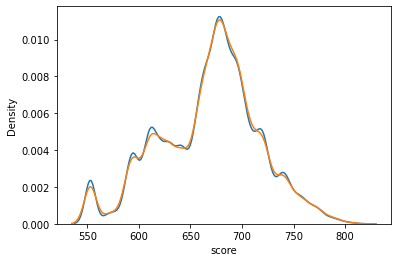

In [ ]:
sns.distplot(Xt['score'],hist=False)
sns.distplot(Xv['score'],hist=False)

## Creación de Score Card

In [ ]:
lst = []
for vi, vp in zip([v[2:] for v in varw], varp ):
    aux = Xt[[vi,vp]].drop_duplicates()
    aux = aux.sort_values(by=vi, ascending=True).reset_index(drop=True)
    aux.columns = ['atributo','puntos']
    aux['caracteristica'] = vi
    lst.append(aux)

In [ ]:
scorecard = pd.concat(lst,ignore_index=True)

In [ ]:
scorecard = scorecard.groupby(['caracteristica','atributo']).sum('puntos')

In [ ]:
scorecard.to_excel('scorecard_stroke_hotel.xlsx')

![image.png](attachment:image.png)